University of Malaya

Faculty of Computer Science & Information Technology

WIA1007 Introduction to Data Science

Group Assignment (Predictive Maintenance, SDGs related)

---



```
Group 17
Dennis Aimin Oon bin Jeffrey Oon - 22001610
Adib Rusyaidi Bin Mohd Zaki - 22001821
Ahmad Firdaus Bin Ahmad Hafiz - 22002552
Amirul Farhan Bin Amir Hamzah - 22002786
Muhammad Imran bin Ilias - 22001723
```


# 1. Data Preprocessing


## 1.1 Data Loading


In [1]:
import pandas as pd
import numpy as np

# Load the csv dataset into a 'dataframe' df
df = pd.read_csv('credit_risk_dataset.csv')
# You can download the credit_risk_dataset.csv file under "data" folder.
# The dataset is about Credit Risk.

The dataset is loaded into the dataframe from the project directory using pandas.

The dataframe is given the name df.



## 1.2 Initial Data Exploration


In [2]:
# Display the first 5 rows of the dataset to get an initial sense of the data.
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Shows data types and non-null values for every columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


From df.info(), we knew the total features and samples we have.
* The dataset has 32581 samples, or rows of observation with 12 columns.
* Have 12 features determining 1 target output (loan status)
* 12 features is good enough
* Have 32581 samples
* Loan status data has enough samples

From df.info(), we knew the features data type.

int64
* person_age
* loan_amnt
* loan_status
* cb_person_cred_hist_length

float64
* person_emp_length
* loan_int_rate
* loan_percent_income

object
* person_home_ownership
* loan_intent
* loan_grade
* cb_person_default_on_file

In [4]:
# Shows the total number of missing values per column.
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


From df.isna().sum(), we know the amount of null values in each column in the dataframe.


*   person_emp_length column have 895 total null values
*   loan_int_rate column have 3116 total null values
*   All other columns have no null values



In [5]:
# Shows the missing values in Boolean.
df.isna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False


df.isna() shows whether there are missing values or not in each column in a row.

*   False means that there are no missing values in the column in the row.

*   True means there are missing values in the column in the row.

In [6]:
# Shows summary statistics (e.g., min, max, mean, std deviation, and quartiles).
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


df.describe() returns the description of the data in each column in the dataframe.
*   count gives the total amount of data in each columns
*   mean gives the average value of the whole column for each columns
*   std gives the standard deviation of each value in the column for each columns
*   min gives the lowest value in each columns
*   25% gives the number of values lower than 25% percentile of the column
*   50% gives the number of values lower than 50% percentile of the column
*   75% gives the number of values lower than 75% percentile of the column
*   max gives the highest value in each columns

## 1.3 Data Cleaning

##### 1.3.1 Changes to the dataframe to make it understandable

In [7]:
# Rename the column from 'person_age' to 'age'
df.rename(columns={'person_age' : 'age'}, inplace=True)

# Rename the column from 'person_income' to 'income'
df.rename(columns={'person_income': 'income'},inplace=True)

# Rename the column from 'person_home_ownership' to 'home_ownership'
df.rename(columns={'person_home_ownership': 'home_ownership'},inplace=True)

# Rename the column from 'person_emp_length' to 'employment_years'
df.rename(columns={'person_emp_length': 'employment_years'},inplace=True)

# Rename the column from 'loan_amnt' to 'loan_amount'
df.rename(columns={'loan_amnt': 'loan_amount'},inplace=True)

# Rename the column from 'loan_percent_income' to 'loan_per_income'
df.rename(columns={'loan_percent_income': 'loan_per_income'},inplace=True)

# Rename the column from 'cb_person_default_on_file' to 'historical_default'
df.rename(columns={'cb_person_default_on_file': 'historical_default'},inplace=True)

# Rename the column from 'cb_person_cred_hist_length' to 'credit_history_length'
df.rename(columns={'cb_person_cred_hist_length': 'credit_history_length'},inplace=True)

Changes to the names of the columns to be shorter and more understandable.

In [8]:
# Check whether the column's name changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32581 non-null  int64  
 1   income                 32581 non-null  int64  
 2   home_ownership         32581 non-null  object 
 3   employment_years       31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amount            32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   loan_status            32581 non-null  int64  
 9   loan_per_income        32581 non-null  float64
 10  historical_default     32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Making sure the changes to the names are saved into the dataframe.

In [9]:
# Change the data in historical_default column to human-readable
df['historical_default'] = df['historical_default'].replace({'Y': 'Yes', 'N': 'No'})

Changes to the values inside the 'historical_default' column.

Changes 'Y' into 'Yes' and 'N' into 'No'.

In [10]:
# Get the latest sense of the data.
df.head(5)

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_per_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Yes,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,No,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,No,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,No,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Yes,4


See what the dataframe currently looks like.

In [11]:
# Correlation analysis
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,age,income,employment_years,loan_amount,loan_int_rate,loan_status,loan_per_income,credit_history_length
age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
employment_years,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amount,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_per_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
credit_history_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


df.corr() shows the strength and direction of the correlation between two columns in the dataframe.
*   The number shows the strength of the correlation or the gradient if we were to graph the values in the two columns
*   The  -  symbol shows that the gradient is negative if we were to graph the values in the two columns. The absence of the  -  symbol means the gradient is positive  

##### 1.3.2 Handling incomplete data/missing values

In [12]:
# Drop rows that has even 1 missing value
df.dropna(inplace=True)

df.dropna() drops every rows that have missing or null values.

inPlace make sure the changes is saved into the dataframe.

In [13]:
# Check whether there are still have missing value
df.isna().sum()

,0
age,0
income,0
home_ownership,0
employment_years,0
loan_intent,0
loan_grade,0
loan_amount,0
loan_int_rate,0
loan_status,0
loan_per_income,0


df.isna().sum() shows missing or null values in the dataframe.

No missing values are detected as they have been dropped in previous code.

##### 1.3.3 Remove outliers

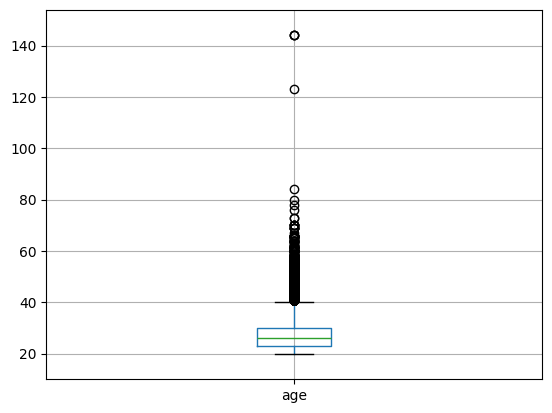

In [14]:
# We use boxplot to find outliers.
# Outliers are values that are higher or lower than most of the data.
import matplotlib.pyplot as plt

# Create a boxplot for the 'age' column
ax = df.boxplot(column='age')

# Set y-axis limits to cover the full range of the data
ax.set_ylim(min(df['age']) - 10, max(df['age']) + 10)

plt.show()

We plot the values in age column in a boxplot to look for the outliers in the dataframe.

Outliers are values that strayed to far away from the rest of the values.

In [15]:
# Drop rows with age over 70 because age limit for personal loan in Malaysia is 70
overage = df['age'] > 70
df.drop(df[overage].index, inplace = True)

Considering the outliers and the age limit for personal loan in Malaysia, which is 70, we decided to drop rows that have age higher than 70.

##### 1.3.4 Remove nonsensible values

In [16]:
df.describe()

,age,income,employment_years,loan_amount,loan_int_rate,loan_status,loan_per_income,credit_history_length
count,28628.000000,2.862800e+04,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000,28628.000000
mean,27.701306,6.643187e+04,4.786782,9657.148596,11.040087,0.216676,0.169514,5.789437
std,6.130424,5.155555e+04,4.148013,6329.854518,3.229637,0.411987,0.106392,4.028095
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


df.describe() return the description of the data in the new dataframe after changes.

In [17]:
# Check whether there are not logic data
x = df[df['employment_years'] > df['age']]
x.head()

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_per_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Yes,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,No,4


x is a new placeholder dataframe that is used to check for nonsensical values, which in this case is if someone have higher employment years than their age.

x.head() shows the first few data containing the nonsensible values.

In [18]:
# Drop rows that employment_years is more than age
result = df['employment_years'] > df['age']
df.drop(df[result].index, inplace = True )

The nonsensible data is saved into variable named result.

The rows containing the nonsensible data is dropped and the changes is saved.

In [19]:
# Check whether there still have not logic data
x = df[df['employment_years'] > df['age']]
x.head()

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_per_income,historical_default,credit_history_length


x is used to check whether the nonsensible data remains in df dataframe.

As they have been dropped, x returns nothing.

##### 1.3.5 Changing each columns' data type into more appropriate data types

In [20]:
# Convert employment_years from float64 to int64 since the data have no decimal point.

df['employment_years'] = df['employment_years'].astype(np.int64)

as the employment_years column have no decimal point, it is not necessary to use float64 as the data type as it takes unnecessary space. The datatype of all values in the column is changed into int64.

In [21]:
# Check whether there is no decimals in employment_years coloumn.
df.head()
# It looks more neatly now without '.0' .

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_per_income,historical_default,credit_history_length
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,No,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,No,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,No,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Yes,4
5,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,No,2


Making sure the changes is saved into the dataframe.

In [22]:
# Check whether data types for employment_years changed from float64 to int64.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28626 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    28626 non-null  int64  
 1   income                 28626 non-null  int64  
 2   home_ownership         28626 non-null  object 
 3   employment_years       28626 non-null  int64  
 4   loan_intent            28626 non-null  object 
 5   loan_grade             28626 non-null  object 
 6   loan_amount            28626 non-null  int64  
 7   loan_int_rate          28626 non-null  float64
 8   loan_status            28626 non-null  int64  
 9   loan_per_income        28626 non-null  float64
 10  historical_default     28626 non-null  object 
 11  credit_history_length  28626 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 2.8+ MB


Making sure the changes is saved into the dataframe.

The dataset is now cleaned

## 1.4 Data Selection and Filtering

We are using all the features in the dataset, so we don't need specific code for data selection and filtering.

We will directly proceed with data transformation.

## 1.5 Data Transformation

##### 1.5.1 Min-max normalization

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'employment_years'}>],
       [<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_per_income'}>],
       [<Axes: title={'center': 'credit_history_length'}>, <Axes: >,
        <Axes: >]], dtype=object)

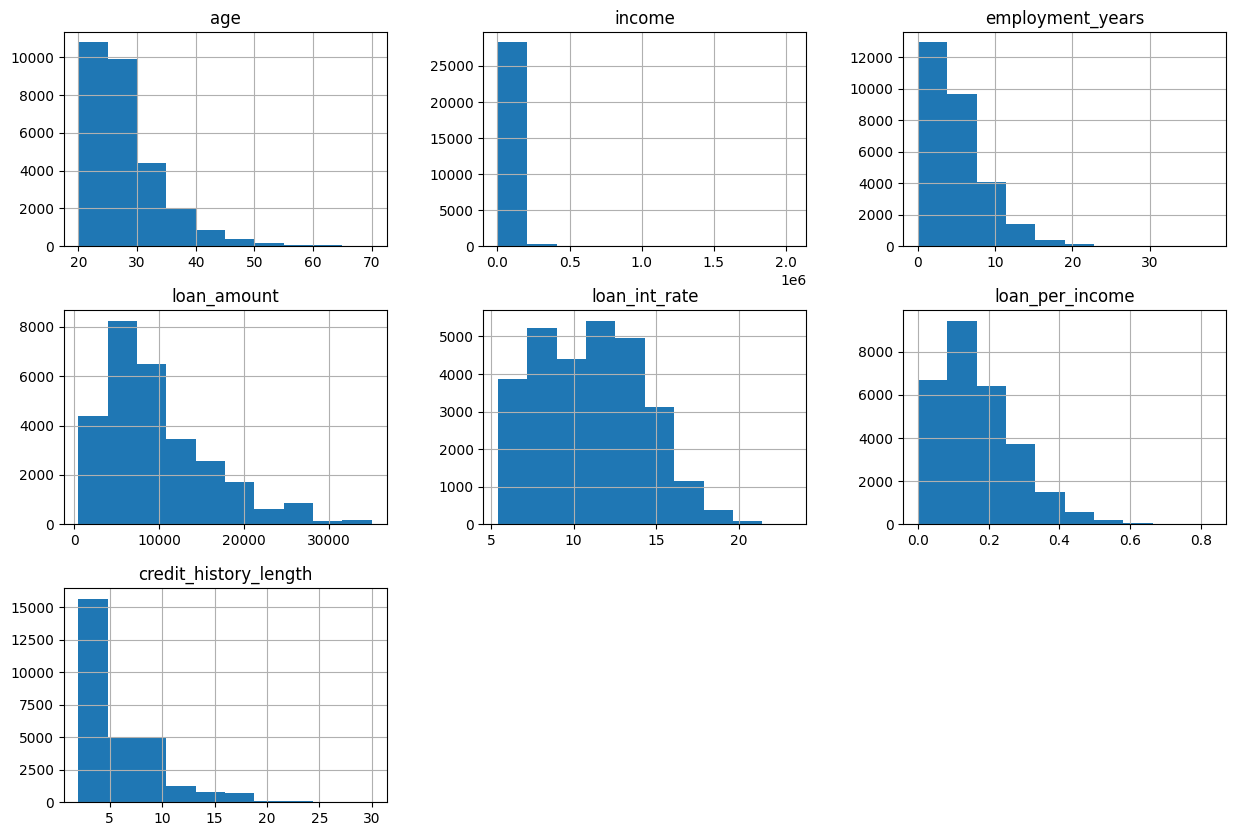

In [23]:
# Before min-max normalization

# Display histograms for each numerical feature in the DataFrame 'df'
# Exclude 'loan_status' column because that is our target variable(y).
# figsize=(15, 10) sets the size of the resulting figure to 15 inches in width and 10 inches in height.
df.drop('loan_status', axis=1).hist(figsize=(15, 10))

* The purpose of creating histograms before normalization is to understand the distribution of values in each numerical feature.

* Histograms provide insights into the spread and concentration of values, potential outliers and the general shape of the data distribution.

In [24]:
from sklearn import preprocessing

# Create a MinMaxScaler with a specified feature range of (0, 1)
m=preprocessing.MinMaxScaler(feature_range=(0,1))

# Create a copy of the original DataFrame 'df' for normalization
df_norm_min_max=df.copy()

# Apply min-max normalization to selected columns
df_norm_min_max[['age','income','employment_years','loan_amount','loan_int_rate','loan_per_income','credit_history_length']]=m.fit_transform(df_norm_min_max[['age','income','employment_years','loan_amount','loan_int_rate','loan_per_income','credit_history_length']])

# Display the first few rows of the DataFrame after min-max normalization
df_norm_min_max.head()

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_per_income,historical_default,credit_history_length
1,0.02,0.002751,OWN,0.131579,EDUCATION,B,0.014493,0.321348,0,0.120482,No,0.000000
2,0.10,0.002751,MORTGAGE,0.026316,MEDICAL,C,0.144928,0.418539,1,0.686747,No,0.035714
3,0.06,0.030209,RENT,0.105263,MEDICAL,C,1.000000,0.551124,1,0.638554,No,0.000000
4,0.08,0.024757,RENT,0.210526,MEDICAL,C,1.000000,0.497191,1,0.662651,Yes,0.071429
5,0.02,0.002898,OWN,0.052632,VENTURE,A,0.057971,0.096629,1,0.301205,No,0.000000


* After this operation, the selected numerical features in df_norm_min_max will have values scaled to the range [0, 1].

* This normalization will be used for machine learning algorithms that are sensitive to the scale of input features.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'employment_years'}>],
       [<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_per_income'}>,
        <Axes: title={'center': 'credit_history_length'}>, <Axes: >]],
      dtype=object)

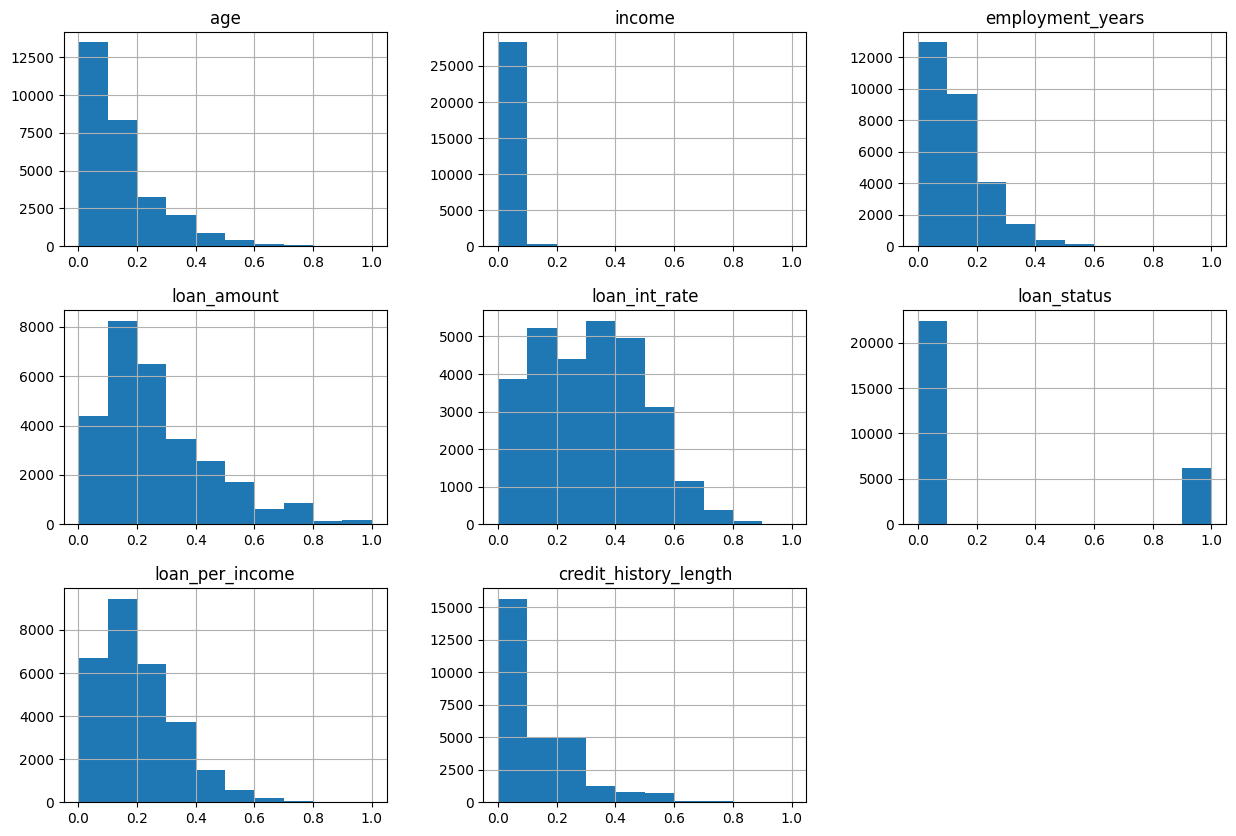

In [25]:
# After min-max normalization

# Display histograms for each numerical feature in the DataFrame 'df'
# figsize=(15, 10) sets the size of the resulting figure to 15 inches in width and 10 inches in height.
df_norm_min_max.hist(figsize=(15,10))

* The purpose of displaying histograms after min-max normalization is to observe the distribution of values in each numerical feature and to check whether the normalization has effectively scaled the values within the desired range.

* This visualization helps in assessing the impact of normalization on the dataset and identifying any potential issues or improvements needed in the preprocessing steps.

##### 1.5.2 Z-score normalization

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'employment_years'}>],
       [<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_per_income'}>,
        <Axes: title={'center': 'credit_history_length'}>, <Axes: >]],
      dtype=object)

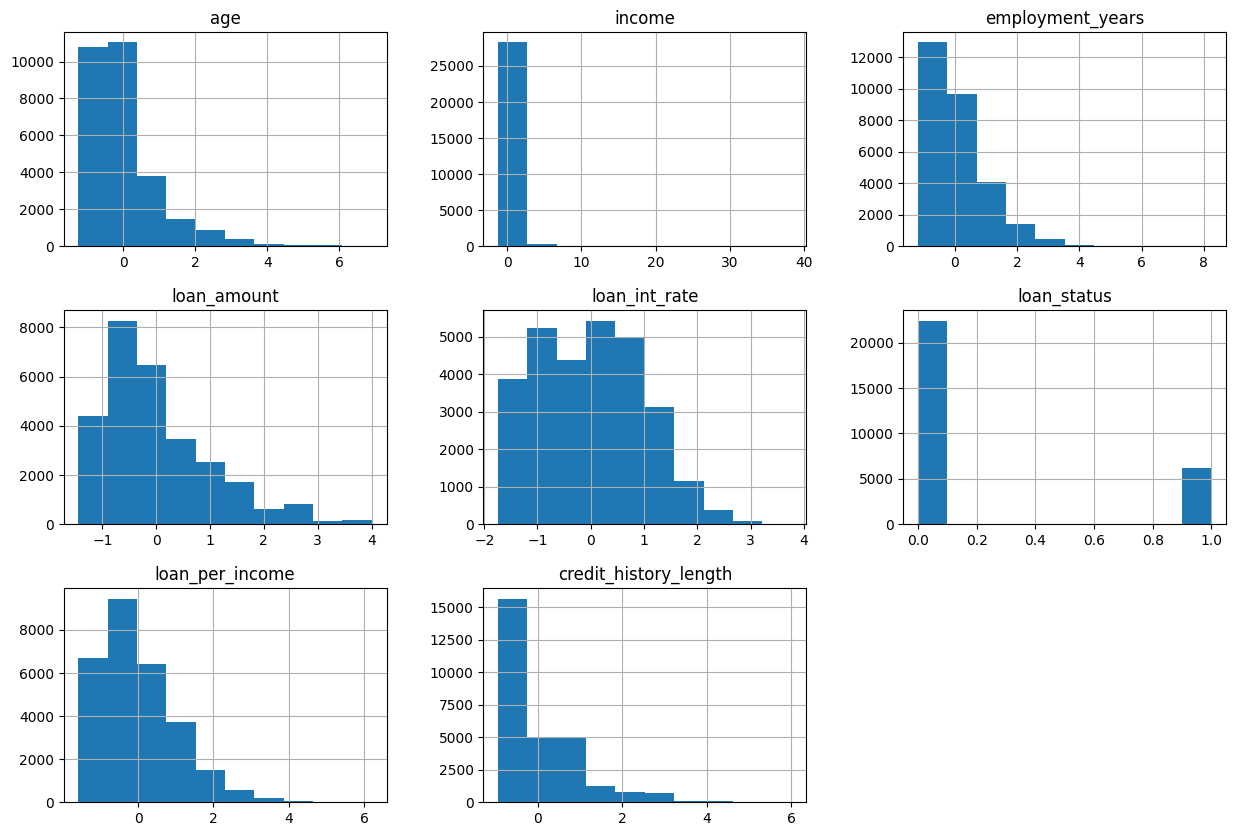

In [26]:
# Create a StandardScaler
m=preprocessing.StandardScaler()

# Create a copy of the original DataFrame 'df' for normalization
df_norm_std_scaler=df.copy()

# Apply standardization to selected columns
df_norm_std_scaler[['age','income','employment_years','loan_amount','loan_int_rate','loan_per_income','credit_history_length']]=m.fit_transform(df_norm_std_scaler[['age','income','employment_years','loan_amount','loan_int_rate','loan_per_income','credit_history_length']])

# Display histograms for each numerical feature in the DataFrame after standardization
df_norm_std_scaler.hist(figsize=(15,10))

* After this operation, the selected numerical features in df_norm_std_scaler will have a mean of 0 and a standard deviation of 1, which is a common requirement for machine learning algorithms that assume standardized input features.

* The histograms help visualize the impact of standardization on the distribution of values in each feature.

## 1.6 Data Aggregation

##### 1.6.1 Group the data by 'age'

In [27]:
# Group the data by 'age' and calculate the average income of the person.
df.groupby('age')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
20,14.0,90297.357143,50253.621916,32652.0,64250.00,77026.0,110298.25,188004.0
21,1060.0,43659.106604,26751.383986,4080.0,27600.00,37200.0,53000.00,249996.0
22,3162.0,53200.504744,25755.070358,4800.0,35000.00,49518.0,65000.00,275000.0
23,3413.0,61086.211544,31754.584782,9000.0,39456.00,55000.0,75000.00,500000.0
24,3130.0,63952.881470,35324.603054,4800.0,40000.00,56000.0,79998.00,425000.0
25,2700.0,66127.441852,38980.302883,5000.0,40000.00,57250.0,80000.00,450000.0
26,2201.0,68471.901408,40113.401556,5500.0,42000.00,59700.0,84000.00,480000.0
27,1887.0,66435.260201,38982.760571,10000.0,40000.00,57770.0,80750.00,390000.0
28,1624.0,69137.246305,45341.419851,8000.0,41000.00,60000.0,83001.00,604000.0


* The describe() method calculates various summary statistics for each group, including count, mean, std (standard deviation), min, 25%, 50% (median), 75% and max.

* This provides insights into the distribution of income values for each age group in the dataset.

##### 1.6.2 Group the data by 'home_ownership'

In [28]:
# Group the data by 'home_ownership' and calculate the average income of the person.
df.groupby('home_ownership')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership,,,,,,,,
MORTGAGE,11796.0,81084.051119,57477.938020,7904.0,50000.0,69996.0,96000.0,1440000.0
OTHER,94.0,79079.861702,86806.136997,11389.0,42246.5,60000.0,82492.0,600000.0
OWN,2192.0,59549.615420,54003.489807,6000.0,32500.0,48000.0,70000.0,1200000.0
RENT,14544.0,55495.526471,41976.657032,4000.0,34000.0,48000.0,67000.0,2039784.0


* The describe() method calculates various summary statistics for each group, including count, mean, std (standard deviation), min, 25%, 50% (median), 75% and max.

* This provides insights into the distribution of income values for each home_ownership group in the dataset.

##### 1.6.3 Group the data by 'loan_intent' and 'loan_status'

In [29]:
# Group the data by 'loan_intent' and 'loan_status' to calculate the average loan amount.
df.groupby(['loan_intent','loan_status'])['loan_amount'].describe()

count          mean          std     min  \
loan_intent       loan_status                                              
DEBTCONSOLIDATION 0            3269.0   9013.780973  5875.208606   725.0   
                  1            1296.0  11307.002315  7263.166693  1000.0   
EDUCATION         0            4731.0   9187.597759  5993.992904   700.0   
                  1             971.0  11139.340886  7115.614794  1000.0   
HOMEIMPROVEMENT   0            2377.0  10558.519142  6395.561965   500.0   
                  1             821.0   9968.544458  7316.466001  1000.0   
MEDICAL           0            3868.0   8607.083764  5670.288455   500.0   
                  1            1421.0  11358.040113  7158.204628   900.0   
PERSONAL          0            3911.0   9409.377397  6088.641640   500.0   
                  1             962.0  10690.488565  7049.612389  1000.0   
VENTURE           0            4268.0   9359.079194  6101.313998   800.0   
                  1             731.0  11305.711354  6852.027300  1000.0   

                                  25%      50%       75%      max  
loan_intent       loan_status                                      
DEBTCONSOLIDATION 0            5000.0   7600.0  12000.00  35000.0  
                  1            5125.0  10000.0  15000.00  35000.0  
EDUCATION         0            5000.0   8000.0  12000.00  35000.0  
                  1            5000.0  10000.0  15000.00  35000.0  
HOMEIMPROVEMENT   0            6000.0   9800.0  14700.00  35000.0  
                  1            4500.0   7650.0  15000.00  35000.0  
MEDICAL           0            4800.0   7200.0  11006.25  35000.0  
                  1            5500.0  10000.0  15000.00  35000.0  
PERSONAL          0            5000.0   8000.0  12000.00  35000.0  
                  1            5000.0   9600.0  15000.00  35000.0  
VENTURE           0            5000.0   8000.0  12000.00  35000.0  
                  1            5500.0  10000.0  16000.00  35000.0

* The describe() method calculates various summary statistics for each group, including count, mean, std (standard deviation), min, 25%, 50% (median), 75% and max.

* This provides insights into the distribution of loan amounts for each combination of loan intent and loan status in the dataset.

##### 1.6.4 Group the data by 'loan_intent'

In [30]:
# Group the data by loan_intent. Diffrent intent have diffrent loan amount range. (Medical vs Homeimprovement)

# Display unique values in the 'loan_intent' column
df['loan_intent'].unique()

# Initialize a counter variable
i=1

# Iterate over unique loan intents and print them with corresponding indices
for c in df['loan_intent'].unique():
  print (f'{i}:{c}')
  i+=1

1:EDUCATION
2:MEDICAL
3:VENTURE
4:PERSONAL
5:HOMEIMPROVEMENT
6:DEBTCONSOLIDATION


* The purpose of this code is to display the unique loan intents present in the 'loan_intent' column of the DataFrame along with their corresponding indices.

* This information is useful for understanding the different categories or classes in the 'loan_intent' column and their distribution in the dataset.

In [31]:
# Group the data by 'loan_intent' and calculate the mean for each group

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Group by 'loan_intent' and calculate mean only for numeric columns
df_by_intent = df.groupby('loan_intent')[numeric_cols].mean()

In [32]:
# Inspect the first few rows of the grouped/aggregated data
df_by_intent.head()

,age,income,employment_years,loan_amount,loan_int_rate,loan_status,loan_per_income,credit_history_length
loan_intent,,,,,,,,
DEBTCONSOLIDATION,27.613143,67016.543921,4.782475,9664.824754,11.022421,0.283899,0.170648,5.705805
EDUCATION,26.535777,64456.855489,4.463522,9519.962294,10.982557,0.170291,0.169288,5.162224
HOMEIMPROVEMENT,29.084428,74503.961226,5.114447,10407.059099,11.225819,0.256723,0.163724,6.475610
MEDICAL,27.898279,61769.587257,4.737001,9346.185479,11.080100,0.268671,0.172927,5.889582
PERSONAL,28.161707,67388.917915,4.877693,9662.287092,11.020975,0.197414,0.168527,6.098297


In [33]:
# Compute additional summary statistics for the grouped/aggregated data
df_by_intent.describe()

,age,income,employment_years,loan_amount,loan_int_rate,loan_status,loan_per_income,credit_history_length
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,27.810842,67016.474501,4.806952,9707.342078,11.051849,0.220538,0.169139,5.844611
std,0.833646,4249.364854,0.212861,364.151858,0.092692,0.056960,0.003056,0.438457
min,26.535777,61769.587257,4.463522,9346.185479,10.979220,0.146229,0.163724,5.162224
25%,27.582072,65083.386916,4.748370,9550.905157,10.992161,0.177072,0.168717,5.713391
50%,27.755711,66989.762559,4.824524,9653.010419,11.021698,0.227069,0.169505,5.812865
75%,28.095850,67295.824417,4.874913,9664.190338,11.065680,0.265684,0.170417,6.046118
max,29.084428,74503.961226,5.114447,10407.059099,11.225819,0.283899,0.172927,6.475610


<Axes: xlabel='loan_intent'>

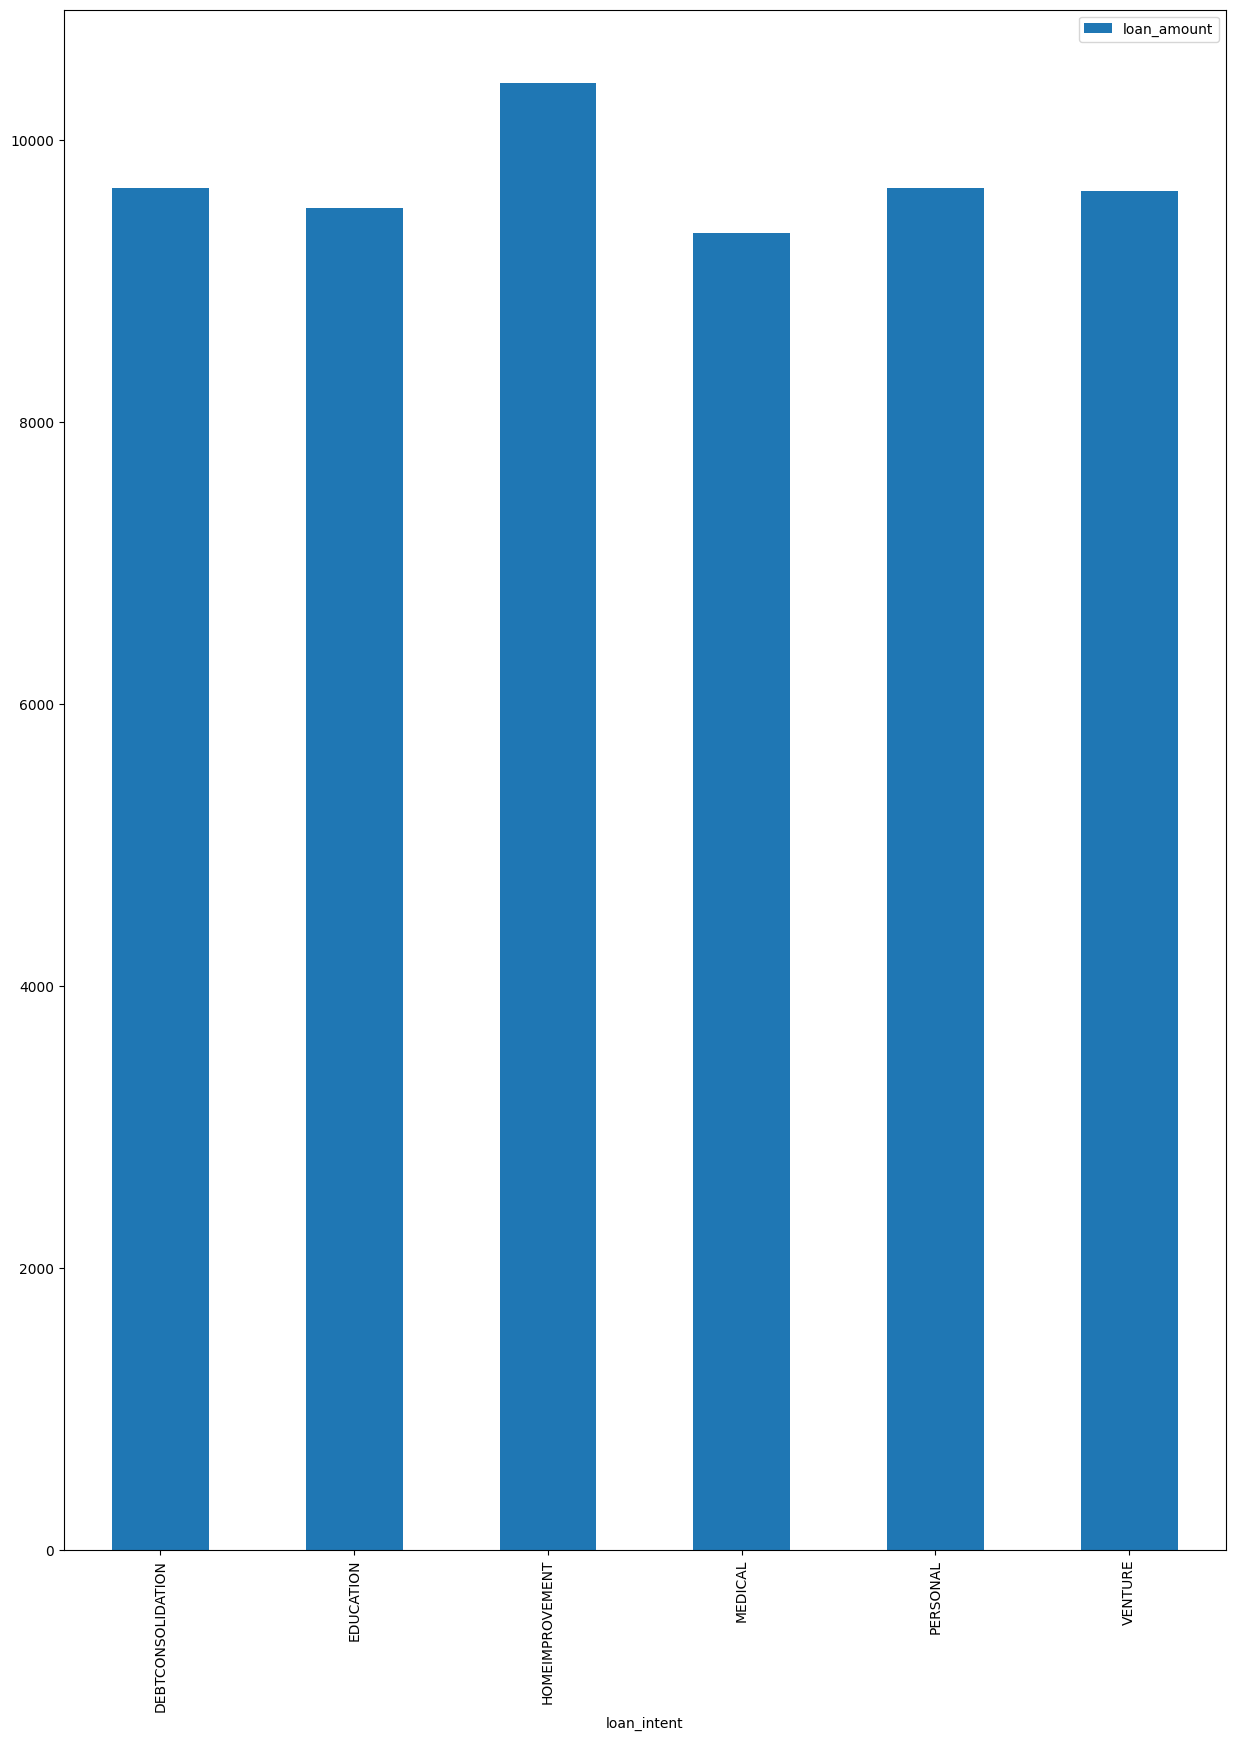

In [34]:
#Create a bar plot with 'loan amount' as y-axis, with width 15 inches and height 20 inches
df_by_intent.plot.bar(y='loan_amount',figsize=(15,20),use_index=True)

* These steps helps us to explore and understand the characteristics of the data after performing groupby or aggregation operations.

## 1.7 Data Visualization

In [35]:
# Display descriptive statistics for each numerical column in the DataFrame 'df' before visualize the data
df.describe()

,age,income,employment_years,loan_amount,loan_int_rate,loan_status,loan_per_income,credit_history_length
count,28626.000000,2.862600e+04,28626.000000,28626.000000,28626.000000,28626.000000,28626.000000,28626.000000
mean,27.701740,6.642775e+04,4.778523,9655.901977,11.040070,0.216656,0.169502,5.789597
std,6.130418,5.155199e+04,4.028743,6328.007742,3.229507,0.411974,0.106366,4.028188
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<Axes: >

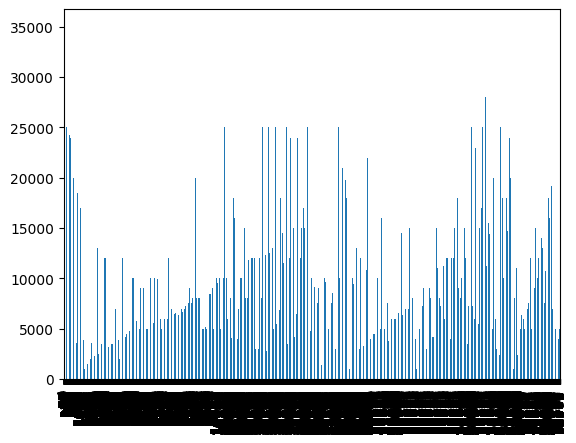

In [36]:
# Create a bar plot with 'loan amount' column
df['loan_amount'].plot.bar()

* The resulting bar plot have bars corresponding to each row or entry in the DataFrame, showcasing the 'loan_amount' values.

* Bar plots are commonly used to visualize the distribution or variation of a numerical variable across different categories or data points.

* But we have a large dataset, a bar plot of every individual data point is overwhelming and not informative.

* This had proven that we should use scatter matrix as below.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='income', ylabel='age'>,
        <Axes: xlabel='employment_years', ylabel='age'>,
        <Axes: xlabel='loan_amount', ylabel='age'>,
        <Axes: xlabel='loan_int_rate', ylabel='age'>,
        <Axes: xlabel='loan_status', ylabel='age'>,
        <Axes: xlabel='loan_per_income', ylabel='age'>,
        <Axes: xlabel='credit_history_length', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='income'>,
        <Axes: xlabel='income', ylabel='income'>,
        <Axes: xlabel='employment_years', ylabel='income'>,
        <Axes: xlabel='loan_amount', ylabel='income'>,
        <Axes: xlabel='loan_int_rate', ylabel='income'>,
        <Axes: xlabel='loan_status', ylabel='income'>,
        <Axes: xlabel='loan_per_income', ylabel='income'>,
        <Axes: xlabel='credit_history_length', ylabel='income'>],
       [<Axes: xlabel='age', ylabel='employment_years'>,
        <Axes: xlabel='income', ylabel='employment_years'>,
        <

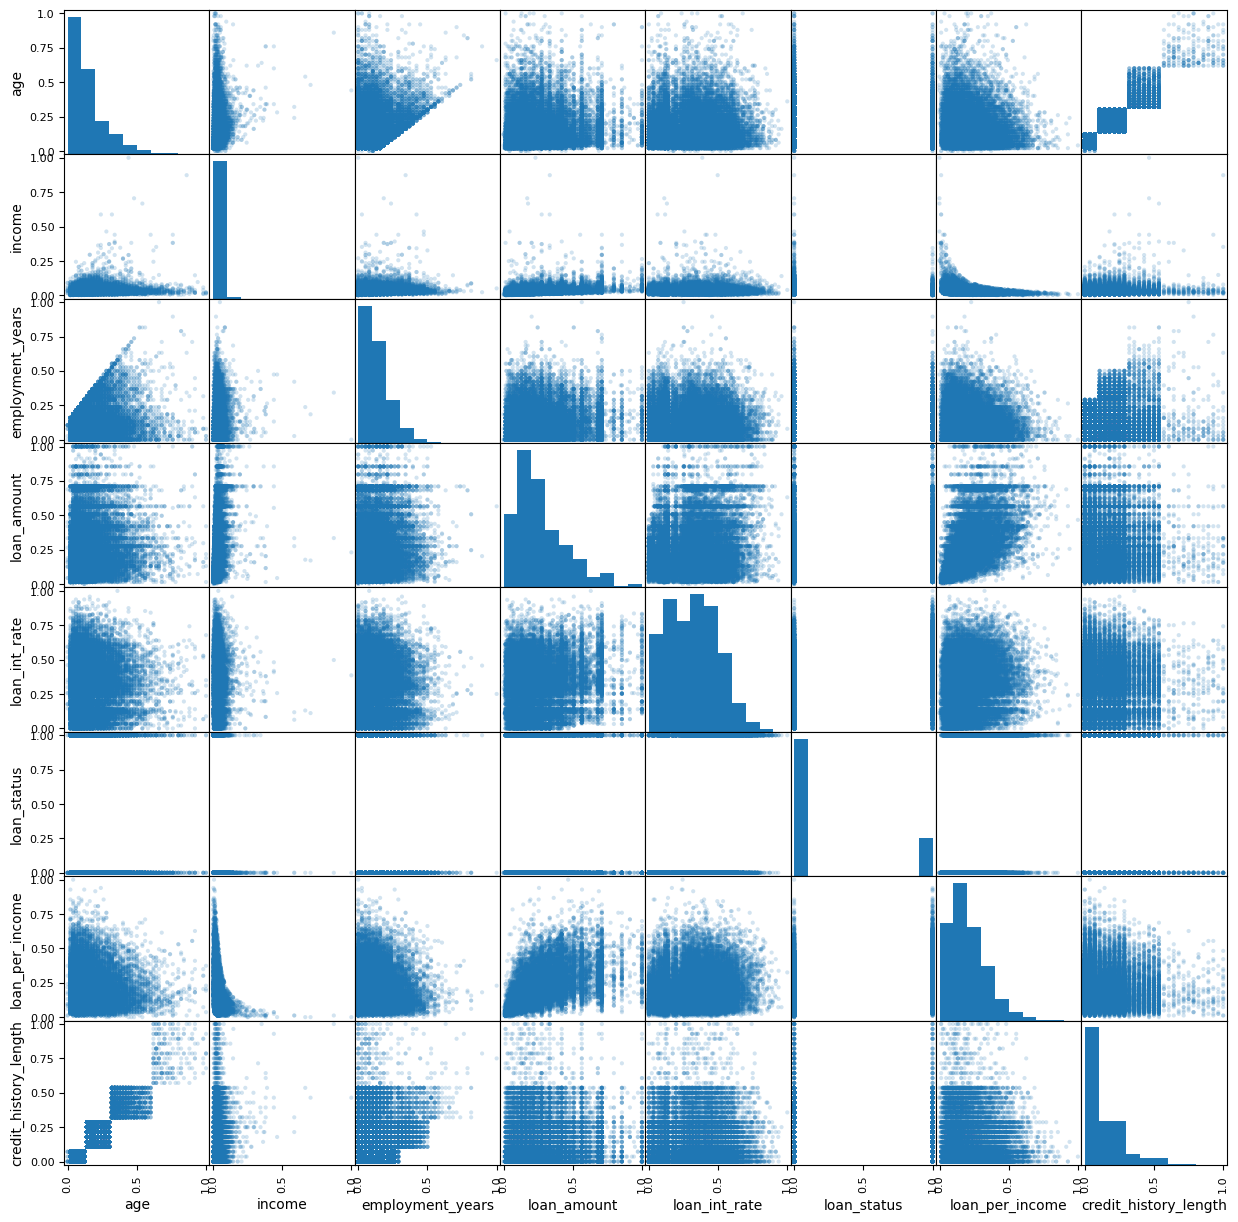

In [37]:
# Gets all the columns with numerical values
df_numerical=df_norm_min_max._get_numeric_data()

# Create a scatter matrix for the numerical columns
pd.plotting.scatter_matrix(df_numerical,alpha=0.2,figsize=(15,15))

* The scatter matrix provides a visual overview of the relationships between pairs of numerical variables in the dataset.

* Each cell in the matrix represents a scatter plot of two variables and the diagonal cells show the distribution of individual variables.

* This visualization is useful for identifying patterns, correlations and potential outliers in the data.

<Axes: >

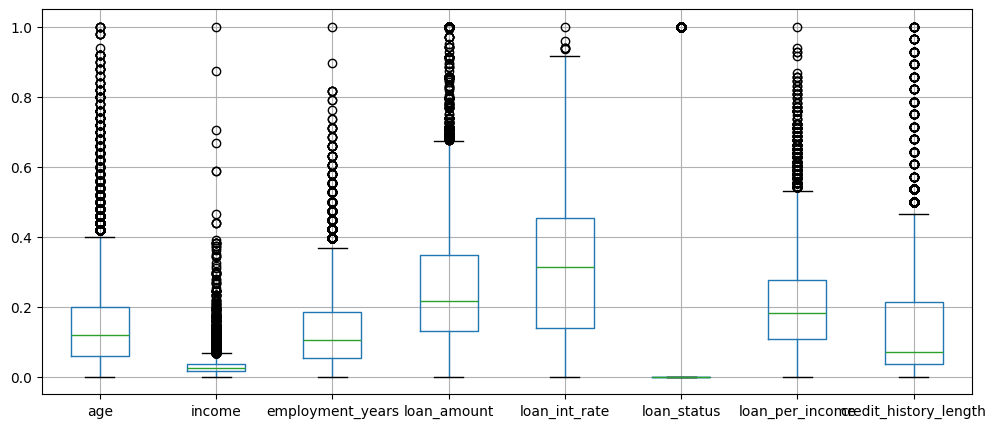

In [38]:
# Create a boxplot for each numerical column in df_numerical
df_numerical.boxplot(figsize=(12,5))

* Each box represents the interquartile range (IQR) of the data with a line inside the box indicating the median.

* The "whiskers" extend to the minimum and maximum values within a certain range and any points beyond the whiskers are considered potential outliers.

* This visualization is helpful for identifying the central tendency, spread and presence of outliers in each numerical variable of the dataset.

* It provides a quick and effective way to understand the distribution of the data across different features.

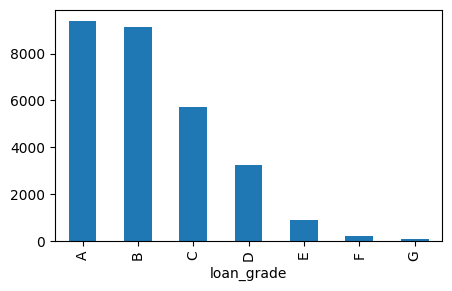

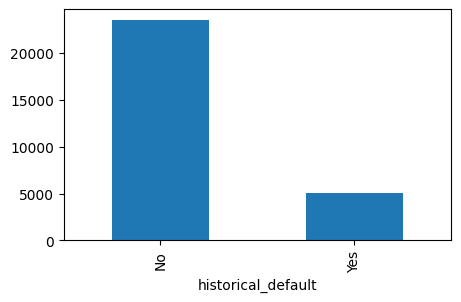

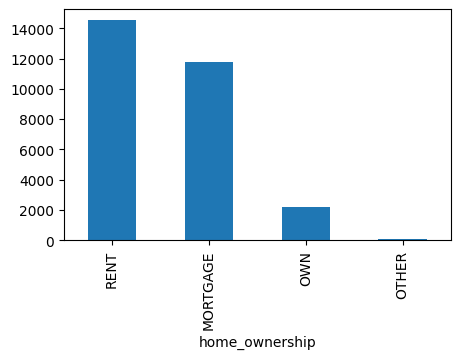

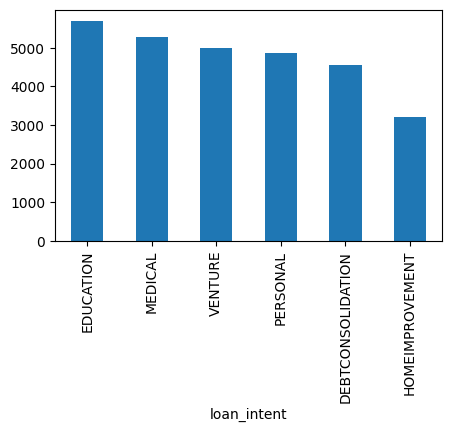

In [39]:
import matplotlib.pyplot as plt

# Takes a list of the dataframe columns
cols=df.columns

# Filter out categorical columns form the list of cols
categorical=list(set(cols) - set(df_numerical))

# Creates a dataframe only with categorical columns
df_categorical = df[categorical]

for col in df_categorical.columns:
    # Counting the unique values in a column
    n_unique = df_categorical[col].nunique()

    # Execute statement below only if the column has <= 10 unique values
    if(n_unique<=10):
      # Count/categorize the number of samples in a unique value and plot it as a bar
      df_categorical[col].value_counts().plot(kind='bar',figsize=(5,3))
      plt.show()

* This code is particularly useful for visualizing the distribution of categorical variables with a small number of unique values, allowing us to understand the frequency of each category in the dataset.

The Dataset is now done with data pre-processing

# 2.0 Model Selection

##### 2.1 Set up the environement

In [40]:
# Install necessary libraries
!pip install feature_engine
!pip install catboost

# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import LabelEncoder
import warnings, gc

# Suppresses warning messages to avoid cluttering the output.
warnings.filterwarnings("ignore")

# Imports specific modules and classes from Scikit-Learn for preprocessing and model evaluation.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

# Imports statistical functions (probplot), outlier handling using Winsorizer from feature_engine and feature selection techniques such as dropping constant, correlated and duplicate features.
from scipy.stats import probplot
from feature_engine.outliers import Winsorizer
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures

# Imports various machine learning models from XGBoost, CatBoost and LightGBM as well as a pipeline from Scikit-Learn.
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Imports the BorderlineSMOTE algorithm for handling imbalanced datasets from the imbalanced-learn library.
from imblearn.over_sampling import BorderlineSMOTE

# Imports the Counter class from the collections module, which can be used for counting elements in a collection (useful for checking class distribution in imbalanced datasets).
from collections import Counter

# Imports the ClassPredictionError class from the Yellowbrick library, which is used for visualizing classification errors
from yellowbrick.classifier import ClassPredictionError

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


 * This code sets up the environment by installing necessary libraries and importing a wide range of libraries and modules for machine learning.

##### 2.2 Early sense of the latest dataset before splitting the features to performs train-test split

In [41]:
# Make a copy of df_numerical to credit_risk
# Model need only numerical data
credit_risk = df_numerical.copy()

In [42]:
# Display the first few rows of the 'credit_risk' DataFrame
credit_risk.head()

,age,income,employment_years,loan_amount,loan_int_rate,loan_status,loan_per_income,credit_history_length
1,0.02,0.002751,0.131579,0.014493,0.321348,0,0.120482,0.000000
2,0.10,0.002751,0.026316,0.144928,0.418539,1,0.686747,0.035714
3,0.06,0.030209,0.105263,1.000000,0.551124,1,0.638554,0.000000
4,0.08,0.024757,0.210526,1.000000,0.497191,1,0.662651,0.071429
5,0.02,0.002898,0.052632,0.057971,0.096629,1,0.301205,0.000000


In [43]:
# Get the dimensions (number of rows and columns) of the 'credit_risk' DataFrame
credit_risk.shape

(28626, 8)

In [44]:
# Get the null value in each column
credit_risk.isnull().sum()

,0
age,0
income,0
employment_years,0
loan_amount,0
loan_int_rate,0
loan_status,0
loan_per_income,0
credit_history_length,0


In [45]:
# Calculate and display the count of each unique value in the 'loan_status' column
credit_risk['loan_status'].value_counts()

,count
loan_status,
0,22424
1,6202


##### 2.3 Splitting features (employment_years, loan_amount, loan_int_rate, loan_status, loan_per_income, credit_history_length) and loan_status column

In [46]:
# Prepare features (X) and target variable (y) for machine learning
X = credit_risk.drop(['loan_status',"age","income"], axis = 1)
y = credit_risk['loan_status']

In [47]:
# Each step in the pipeline performs a specific operation:
# 'constant': Drops constant features using the 'DropConstantFeatures' transformer.
# 'correlated': Drops correlated features using the 'DropCorrelatedFeatures' transformer.
# 'duplicate': Drops duplicate features using the 'DropDuplicateFeatures' transformer.

# The 'pipeline' variable represents the entire sequence of operations.
pipeline = Pipeline(steps=[
    ('constant',DropConstantFeatures()),
    ('correlated',DropCorrelatedFeatures()),                              #function of pipeline
    ('duplicate',DropDuplicateFeatures())
])
# Apply the pipeline to transform the features in X
X = pipeline.fit_transform(X)
# Display the dimensions of the transformed feature matrix
X.shape

(28626, 5)

In [48]:
# BorderlineSMOTE is a variant of SMOTE that generates synthetic samples for the minority class while focusing on borderline instances
smote = BorderlineSMOTE()
# Apply SMOTE to resample the features (X) and target variable (y)
X, y = smote.fit_resample(X, y)
# Display the final dimensions of target label classes after applying SMOTE
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({0: 22424, 1: 22424})


##### 2.4 Performs train-test split and scales the features using StandardScaler.

In [49]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets, ensuring that the class distribution is preserved (stratified split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
#scaling variables
scaler = StandardScaler()
#scaler= RobustScaler()
scaled_train_X = scaler.fit_transform(X_train)
# Scale the testing features using the same scaler instance
scaled_test_X = scaler.transform(X_test)

# 3.0 Model Training and Evaluation

Defined function train_and_evaluate_model to train and evaluate a classification model

 function that trains and evaluates a classification model, displays various evaluation metrics, and stores performance metrics in lists for later analysis. The function is then called with a CatBoostClassifier. Adjust the code and comments based on your specific requirements and preferences.

## 3.1 CatBoostClassifier Model

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4485
           1       0.92      0.90      0.91      4485

    accuracy                           0.91      8970
   macro avg       0.91      0.91      0.91      8970
weighted avg       0.91      0.91      0.91      8970

--------------------------------------------------


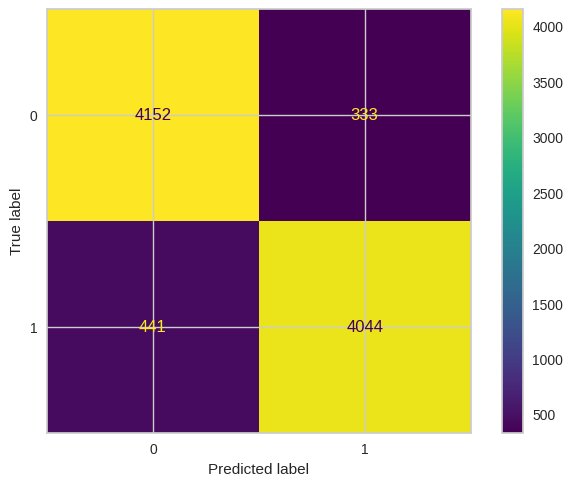

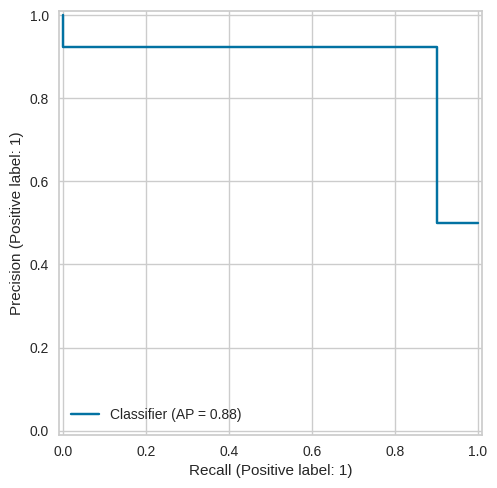

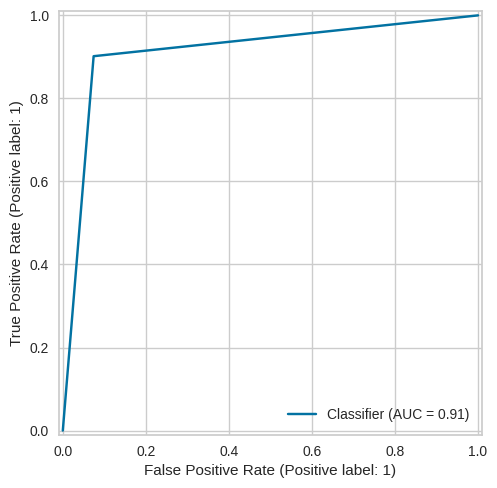

In [50]:
import re
# Lists to store model performance metrics
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

 # Fit the model on the training data
 # Make predictions on the testing data
 # Print the classification report
def train_and_evaluate_model(model):
    model.fit(scaled_train_X,y_train)
    y_pred = model.predict(scaled_test_X)
    print("Classification Report:")
    print(classification_report(y_test,y_pred))
    print('-'*50)

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    # Display precision-recall curve
    PrecisionRecallDisplay.from_predictions(y_test,y_pred)
    # Display ROC curve
    RocCurveDisplay.from_predictions(y_test,y_pred)

    # Calculate and store performance metrics(1)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    recall = recall_score(y_test,y_pred,average='macro')
    f1 = f1_score(y_test,y_pred,average='macro')
    roc_auc = roc_auc_score(y_test,y_pred,average='macro')

    # Additional visualization for non-CatBoost models
    if re.search('catboost',str(model)) == None:
        visualizer = ClassPredictionError(model)
        visualizer.score(scaled_test_X,y_test)
        visualizer.show()
        del visualizer

    # Calculate and store performance metrics(2)
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    models.append(model)

    # Cleanup and release memory
    del acc, precision, recall, f1, roc_auc
    gc.collect()

    # Call the function with a CatBoostClassifier
train_and_evaluate_model(CatBoostClassifier(silent=True))

## 3.2 LGBMClassifier Model

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4485
           1       0.90      0.90      0.90      4485

    accuracy                           0.90      8970
   macro avg       0.90      0.90      0.90      8970
weighted avg       0.90      0.90      0.90      8970

--------------------------------------------------


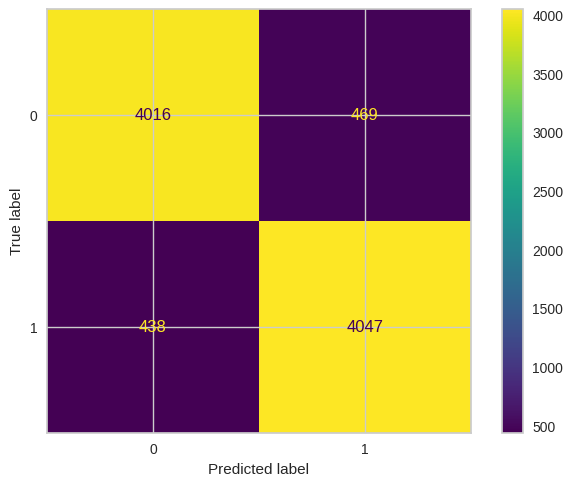

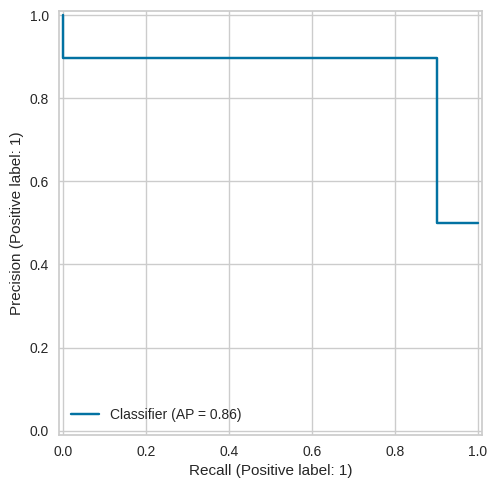

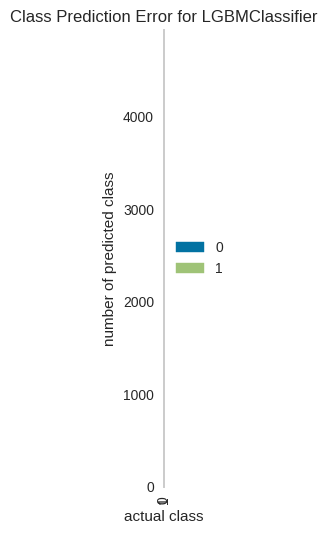

In [51]:
# Call the function with a LGBMClassifier
train_and_evaluate_model(LGBMClassifier(verbose=-1))

## 3.3 RandomForestClassifier Model

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4485
           1       0.90      0.92      0.91      4485

    accuracy                           0.91      8970
   macro avg       0.91      0.91      0.91      8970
weighted avg       0.91      0.91      0.91      8970

--------------------------------------------------


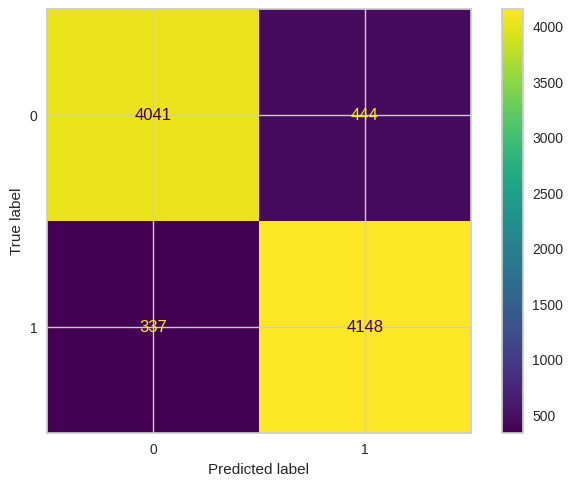

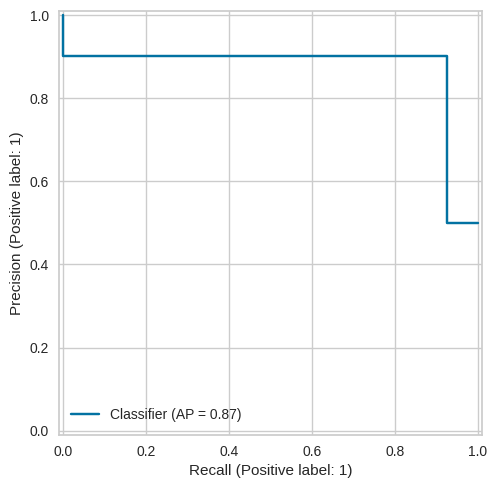

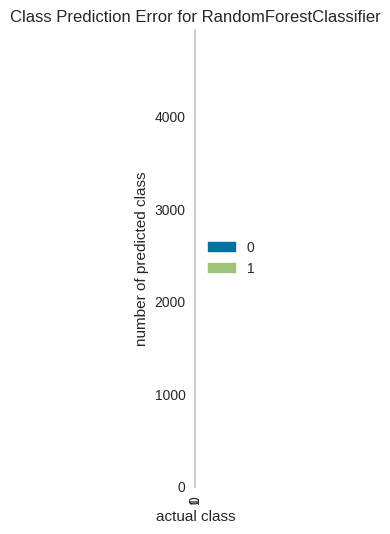

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Call the function with a RandomForestClassifier
train_and_evaluate_model(RandomForestClassifier())

## 3.4 XGBClassifier Model

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4485
           1       0.91      0.89      0.90      4485

    accuracy                           0.90      8970
   macro avg       0.90      0.90      0.90      8970
weighted avg       0.90      0.90      0.90      8970

--------------------------------------------------


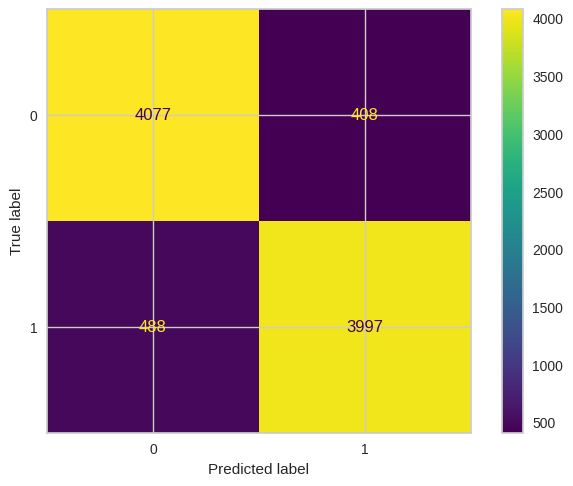

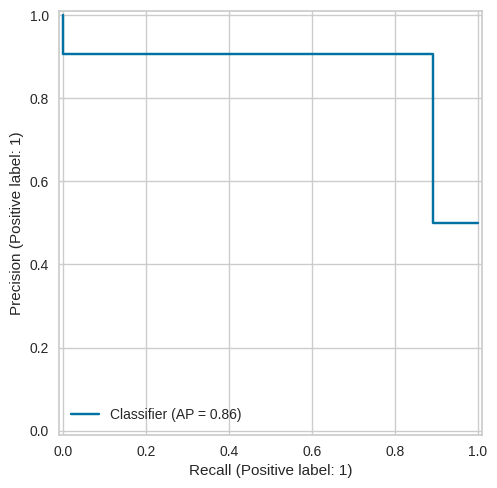

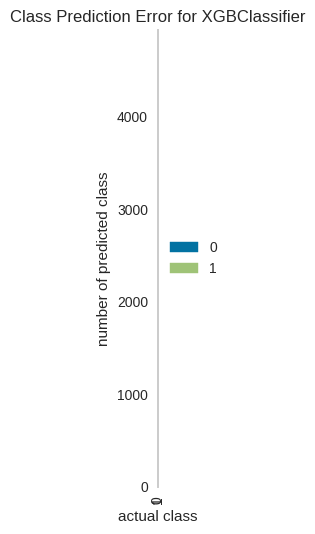

In [53]:
# Call the function with an XGBClassifier
train_and_evaluate_model(XGBClassifier())

## 3.5 StackingClassifier Model

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4485
           1       0.94      0.94      0.94      4485

    accuracy                           0.94      8970
   macro avg       0.94      0.94      0.94      8970
weighted avg       0.94      0.94      0.94      8970

--------------------------------------------------


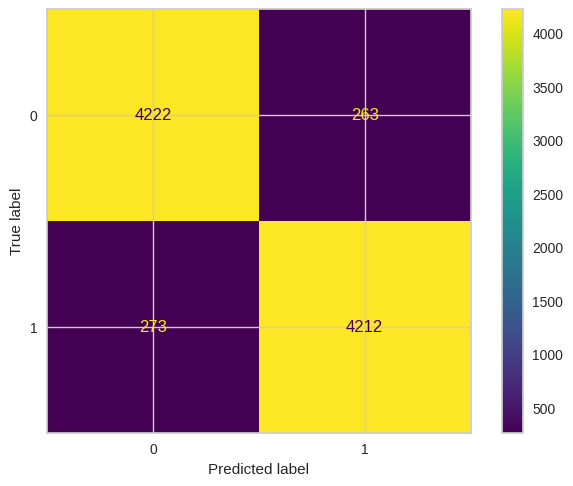

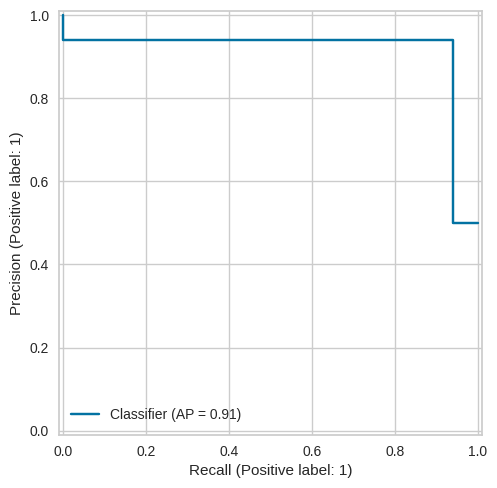

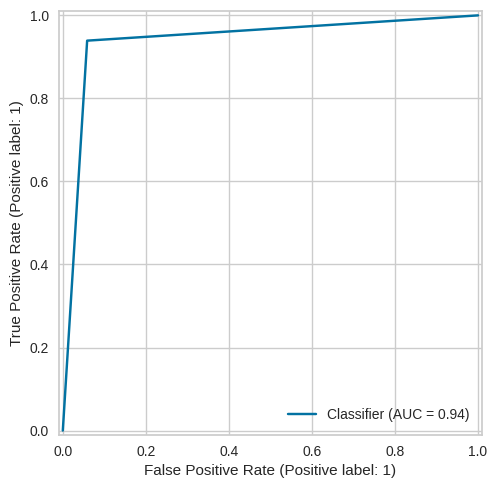

In [54]:
from sklearn.ensemble import ExtraTreesClassifier, StackingClassifier

# Create a StackingClassifier with ExtraTrees, XGBoost, and CatBoost as base estimators, and RandomForest as the final estimator
train_and_evaluate_model(StackingClassifier(estimators=[
    ('ET',ExtraTreesClassifier()),
    ('XGB',XGBClassifier()),
    ('CAT',CatBoostClassifier(silent=True))
],final_estimator=RandomForestClassifier(),verbose=2))

# 4.0 Report On All Evaluation Metrics Between Models

In [55]:
# Create a DataFrame to store model performance metrics
model_perfs = pd.DataFrame({'Model': models,
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores,
                            'Recall': recall_scores,
                            'F1': f1_scores,
                            'ROC-AUC': roc_auc_scores}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Check if arrays have the same length
if len(roc_auc_scores) != len(models):
    raise ValueError("All arrays must be of the same length")

    # Display the DataFrame
model_perfs

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,"StackingClassifier(estimators=[('ET', ExtraTre...",0.940245,0.940247,0.940245,0.940245,0.940245
1,<catboost.core.CatBoostClassifier object at 0x...,0.913712,0.913952,0.913712,0.913700,0.913712
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.912932,0.913167,0.912932,0.912920,0.912932
3,"XGBClassifier(base_score=None, booster=None, c...",0.900111,0.900239,0.900111,0.900104,0.900111
4,LGBMClassifier(verbose=-1),0.898885,0.898904,0.898885,0.898884,0.898885


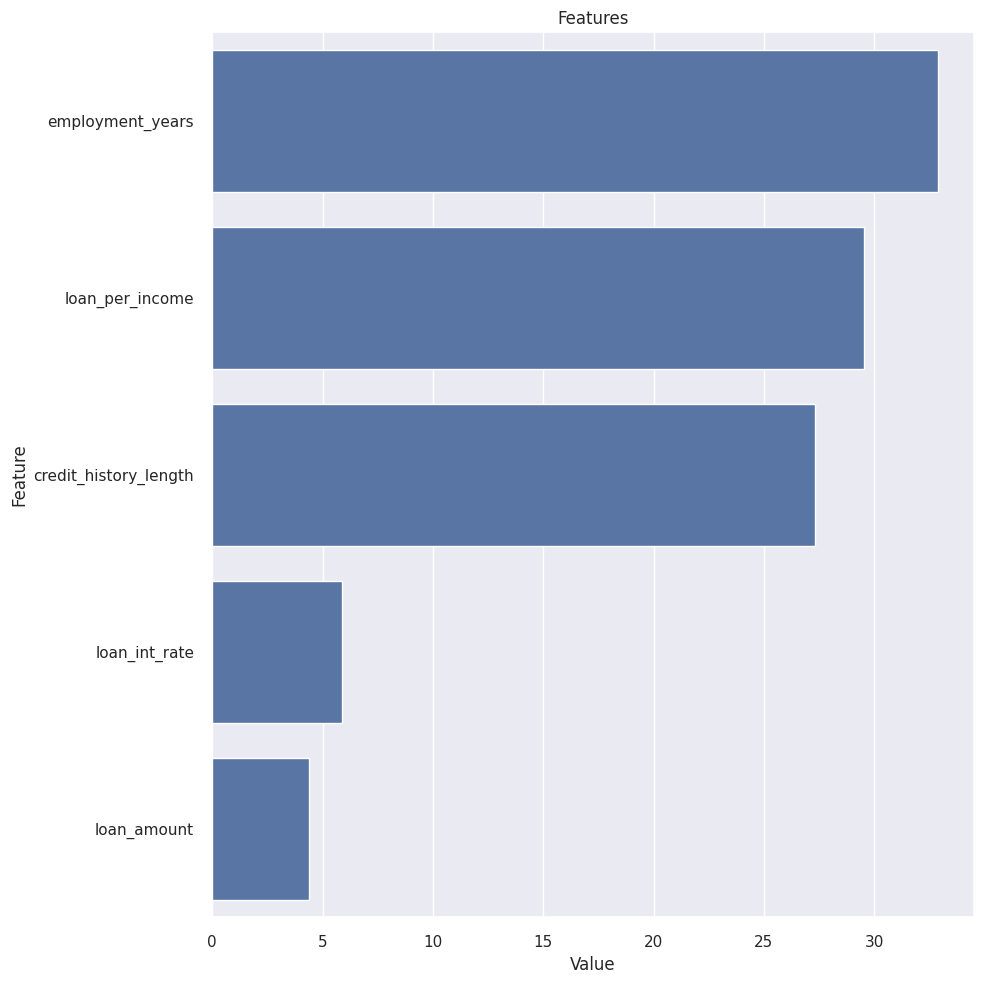

In [56]:
def plot_importance(model, features, num=len(X), save=False):


    #Plot feature importances using a bar plot.

    #Parameters:
    # - model: The trained machine learning model.
    # - features: The DataFrame containing the features.
    # - num: The number of top features to display (default is all features).
    # - save: Whether to save the plot as an image file (default is False).

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

# Example usage with CatBoostClassifier
model = CatBoostClassifier(silent=True)
model.fit(X, y)

# Assuming X is a DataFrame containing the features
plot_importance(model, X)

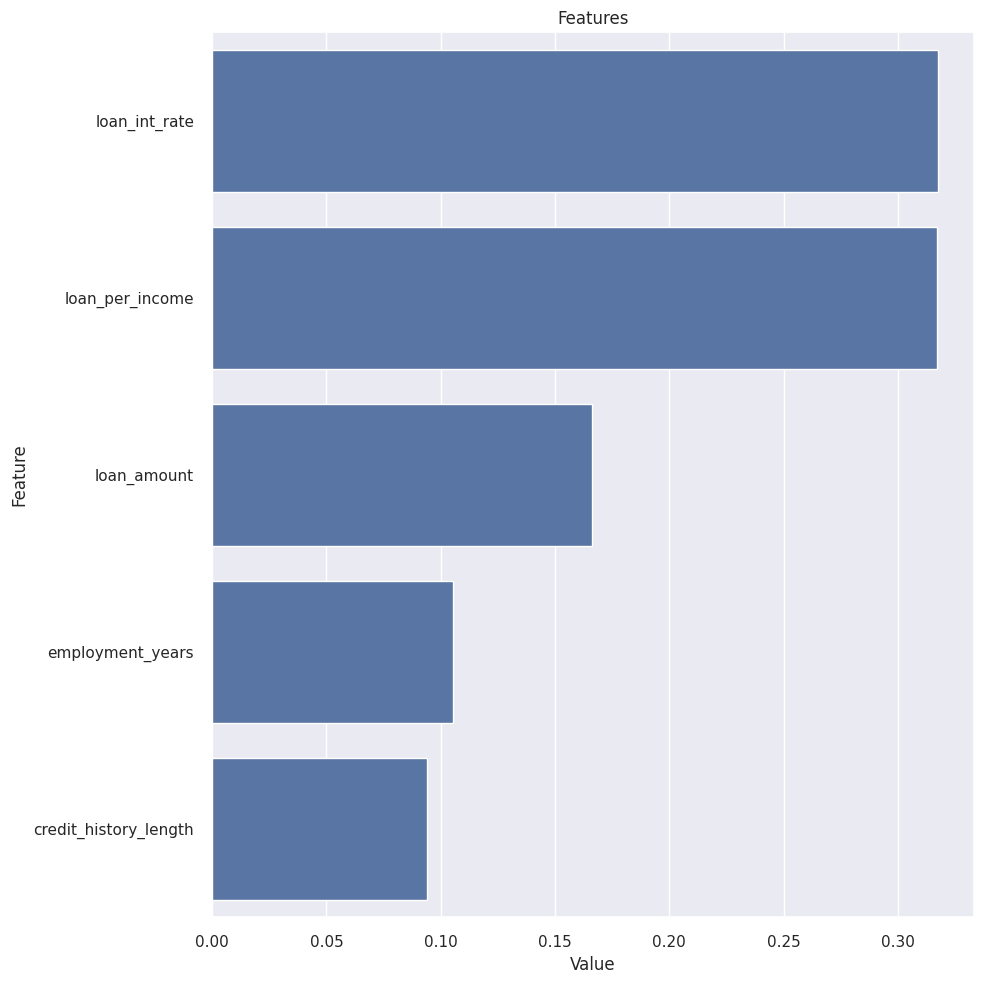

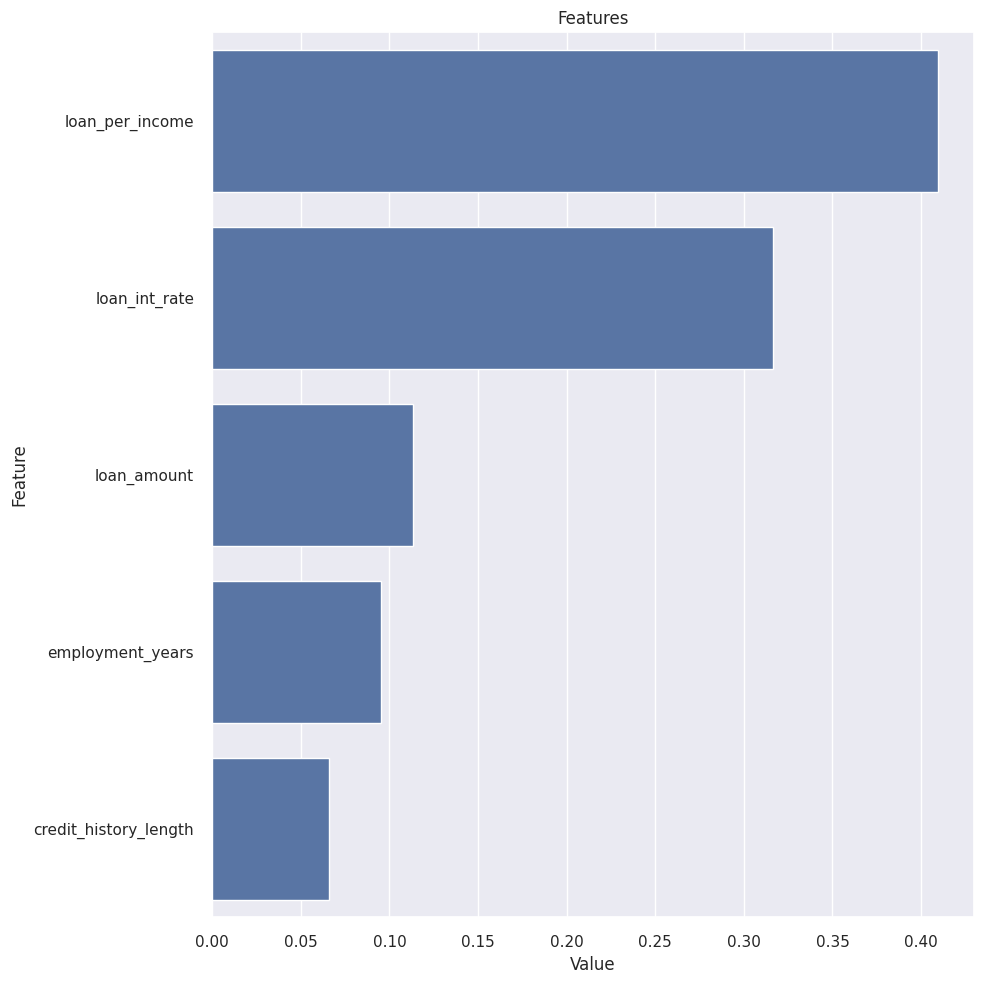

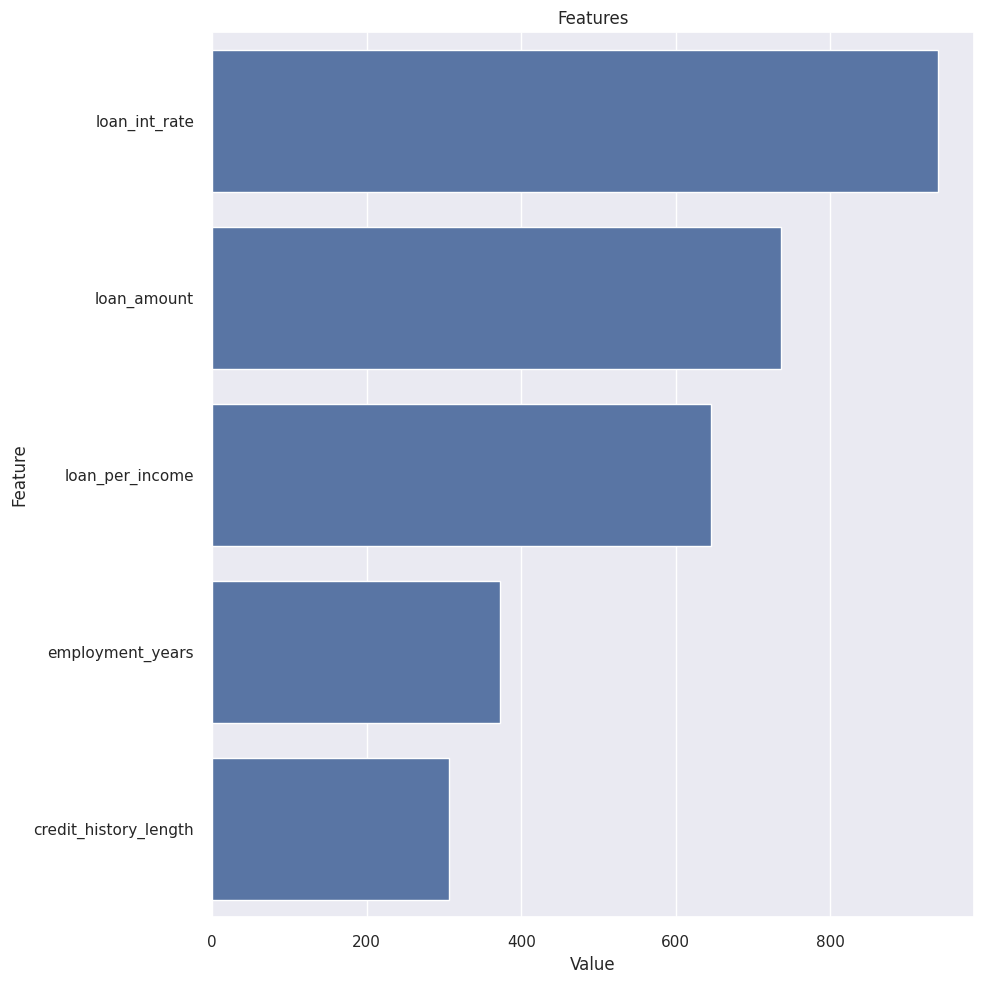

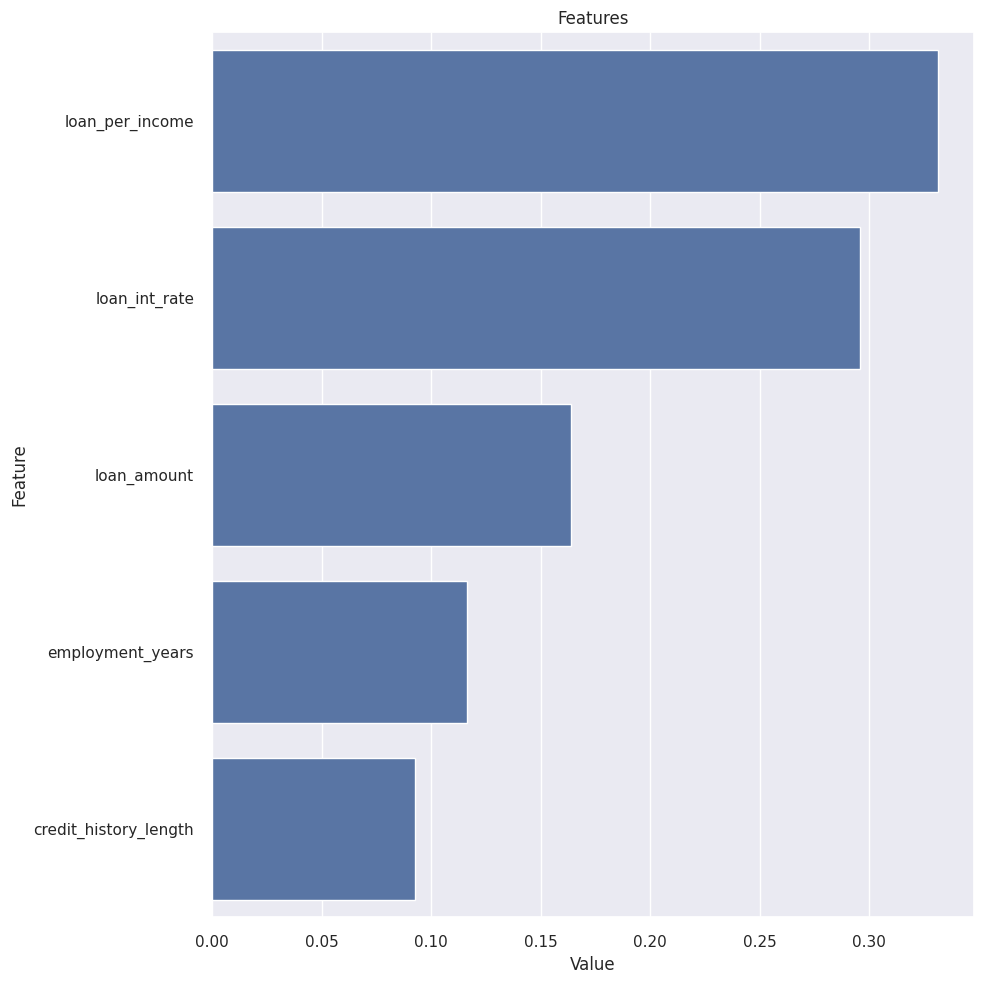

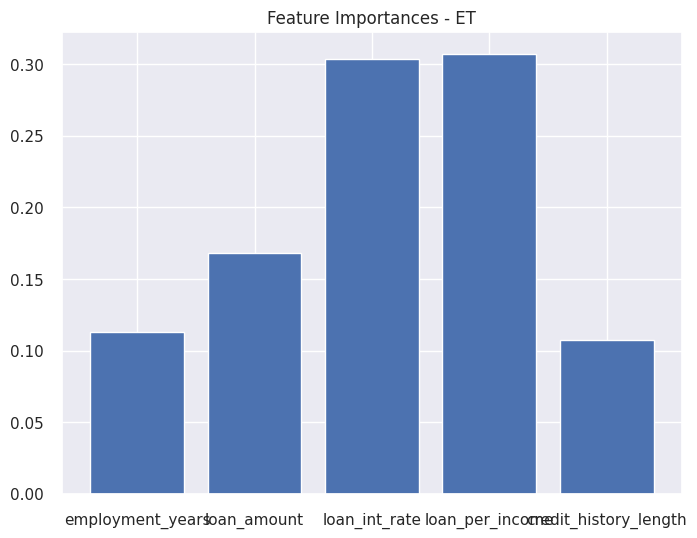

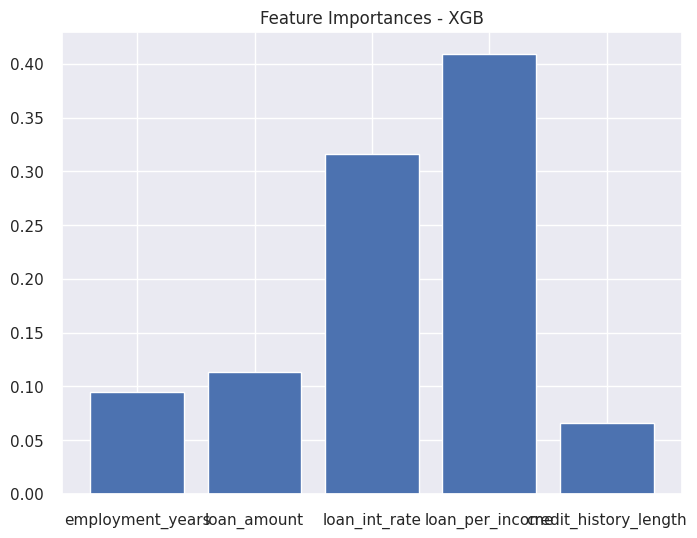

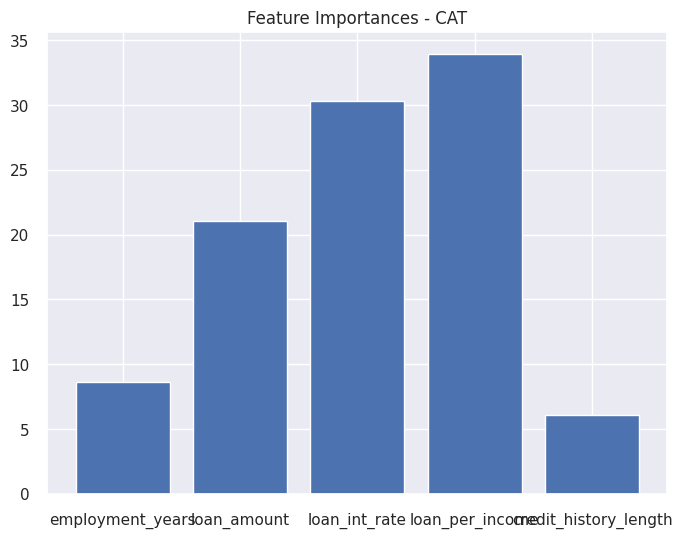

In [57]:
from sklearn.tree import DecisionTreeClassifier
# Example usage with RandomForestClassifier
X = credit_risk.drop(['loan_status',"age","income"], axis = 1)
y = credit_risk['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Assuming X is a DataFrame containing the features
plot_importance(rf_model,X)

# Example usage with XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

plot_importance(xgb_model,X)

# Example usage with LGBMClassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

plot_importance(lgbm_model,X)

# Example usage with DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

plot_importance(dt_model,X)

# Create a StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('ET', ExtraTreesClassifier()),
        ('XGB', XGBClassifier()),
        ('CAT', CatBoostClassifier(silent=True))
    ],
    final_estimator=RandomForestClassifier(),
    verbose=2
)

# Fit the StackingClassifier on the training data
stacking_model.fit(X_train, y_train)

# Access feature importances from each base estimator
feature_importances = {}

for name, estimator in stacking_model.named_estimators_.items():
    if hasattr(estimator, 'feature_importances_'):
        feature_importances[name] = estimator.feature_importances_

# Plot or display feature importances for each base estimator
for name, importances in feature_importances.items():
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(importances)), importances, tick_label=X_train.columns)
    plt.title(f"Feature Importances - {name}")
    plt.show()

In [58]:
print(X_train.dtypes)

employment_years         float64
loan_amount              float64
loan_int_rate            float64
loan_per_income          float64
credit_history_length    float64
dtype: object


# 5.0 Summarise of experiments with models and dataset

In [59]:
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
# Split the data into features (X) and target variable (y)
X = credit_risk.drop(['loan_status', 'age', 'income'], axis=1)
y = credit_risk['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results_table = []

# Experiment 1: Data Transformation using Min-Max Scaler
# Apply Min-Max scaling to X_train
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Random Forest model with Min-Max scaling
rf_model_minmax = RandomForestClassifier()
rf_model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax_rf = rf_model_minmax.predict(X_test_minmax)
accuracy_minmax_rf = accuracy_score(y_test, y_pred_minmax_rf)
results_table.append(["Experiment 1", "Random Forest with Min-Max Scaler", accuracy_minmax_rf])

# XGBoost model with Min-Max scaling
xgb_model_minmax = XGBClassifier()
xgb_model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax_xgb = xgb_model_minmax.predict(X_test_minmax)
accuracy_minmax_xgb = accuracy_score(y_test, y_pred_minmax_xgb)
results_table.append(["Experiment 1", "XGBoost with Min-Max Scaler", accuracy_minmax_xgb])

# CatBoost with Min-Max scaling
catboost_model_minmax = CatBoostClassifier(silent=True)
catboost_model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax_catboost = catboost_model_minmax.predict(X_test_minmax)
accuracy_minmax_catboost = accuracy_score(y_test, y_pred_minmax_catboost)
results_table.append(["Experiment 1", "CatBoost with Min-Max Scaler", accuracy_minmax_catboost])

# LightGBM with Min-Max scaling
lgbm_model_minmax = LGBMClassifier()
lgbm_model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax_lgbm = lgbm_model_minmax.predict(X_test_minmax)
accuracy_minmax_lgbm = accuracy_score(y_test, y_pred_minmax_lgbm)
results_table.append(["Experiment 1", "LightGBM with Min-Max Scaler", accuracy_minmax_lgbm])

# Stacking with Min-Max scaling
estimators_minmax = [
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('LGBM', LGBMClassifier()),
    ('DecisionTree', DecisionTreeClassifier())
]

# Implementing the Machine Learning model using a stacking ensemble approach with Min-Max scaling
stacking_model_minmax = StackingClassifier(estimators=estimators_minmax, final_estimator=DecisionTreeClassifier())
stacking_model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax_stacking = stacking_model_minmax.predict(X_test_minmax)
accuracy_minmax_stacking = accuracy_score(y_test, y_pred_minmax_stacking)
results_table.append(["Experiment 1", "Stacking with Min-Max Scaler", accuracy_minmax_stacking])

# Experiment 2: Data Transformation using Standard Scaler
# Apply Standard scaling to X_train
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Random Forest model with Standard scaling
rf_model_standard = RandomForestClassifier()
rf_model_standard.fit(X_train_standard, y_train)
y_pred_standard_rf = rf_model_standard.predict(X_test_standard)
accuracy_standard_rf = accuracy_score(y_test, y_pred_standard_rf)
results_table.append(["Experiment 2", "Random Forest with Standard Scaler", accuracy_standard_rf])

# XGBoost model with Standard scaling
xgb_model_standard = XGBClassifier()
xgb_model_standard.fit(X_train_standard, y_train)
y_pred_standard_xgb = xgb_model_standard.predict(X_test_standard)
accuracy_standard_xgb = accuracy_score(y_test, y_pred_standard_xgb)
results_table.append(["Experiment 2", "XGBoost with Standard Scaler", accuracy_standard_xgb])

# CatBoost with Standard scaling
catboost_model_standard = CatBoostClassifier(silent=True)
catboost_model_standard.fit(X_train_standard, y_train)
y_pred_standard_catboost = catboost_model_standard.predict(X_test_standard)
accuracy_standard_catboost = accuracy_score(y_test, y_pred_standard_catboost)
results_table.append(["Experiment 2", "CatBoost with Standard Scaler", accuracy_standard_catboost])

# LightGBM with Standard scaling
lgbm_model_standard = LGBMClassifier()
lgbm_model_standard.fit(X_train_standard, y_train)
y_pred_standard_lgbm = lgbm_model_standard.predict(X_test_standard)
accuracy_standard_lgbm = accuracy_score(y_test, y_pred_standard_lgbm)
results_table.append(["Experiment 2", "LightGBM with Standard Scaler", accuracy_standard_lgbm])

# Stacking with Standard scaling
estimators_standard = [
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('LGBM', LGBMClassifier()),
    ('DecisionTree', DecisionTreeClassifier())
]

#Implementing the Machine Learning model using a stacking ensemble approach with Standard scaling for data preprocessing
stacking_model_standard = StackingClassifier(estimators=estimators_standard, final_estimator=DecisionTreeClassifier())
stacking_model_standard.fit(X_train_standard, y_train)
y_pred_standard_stacking = stacking_model_standard.predict(X_test_standard)
accuracy_standard_stacking = accuracy_score(y_test, y_pred_standard_stacking)
results_table.append(["Experiment 2", "Stacking with Standard Scaler", accuracy_standard_stacking])

# Display results in table format
headers = ["Experiment", "Method", "Accuracy"]
print(tabulate(results_table, headers=headers, tablefmt="grid"))

+--------------+------------------------------------+------------+
| Experiment   | Method                             |   Accuracy |
+==============+====================================+============+
| Experiment 1 | Random Forest with Min-Max Scaler  |   0.876353 |
+--------------+------------------------------------+------------+
| Experiment 1 | XGBoost with Min-Max Scaler        |   0.861334 |
+--------------+------------------------------------+------------+
| Experiment 1 | CatBoost with Min-Max Scaler       |   0.866574 |
+--------------+------------------------------------+------------+
| Experiment 1 | LightGBM with Min-Max Scaler       |   0.865526 |
+--------------+------------------------------------+------------+
| Experiment 1 | Stacking with Min-Max Scaler       |   0.791652 |
+--------------+------------------------------------+------------+
| Experiment 2 | Random Forest with Standard Scaler |   0.874258 |
+--------------+------------------------------------+---------

## 6.0 Conclusion
The output shows the accuracy of different machine learning algorithms on the dataset under different experiments, considering two types of scalers: Min-Max Scaler and Standard Scaler.

1) Random Forest, XGBoost, CatBoost, LightGBM:
* Random Forest achieved the highest accuracy among all algorithms with both Min-Max and Standard Scalers.
* XGBoost, CatBoost and LightGBM performed competitively, with similar accuracy values.

2) Scalers Comparison:
* There is no significant difference in performance between Min-Max Scaler and Standard Scaler for most algorithms.
* In some cases, Standard Scaler slightly outperformed Min-Max Scaler and vice versa.

3) Stacking:
* The stacking approach, where multiple models are combined, performed slightly lower than individual algorithms in both Min-Max and Standard Scaler experiments.

4) Overall:
* Random Forest appears to be a strong performer on the dataset.
* XGBoost, CatBoost and LightGBM, being gradient boosting algorithms, also provided good results.
* The choice between Min-Max Scaler and Standard Scaler depend on the specific characteristics of the dataset and the performance difference is relatively small.

* From the table above, proven that the best algorithm for this dataset is Random Forest with Min-Max Scaler with accuracy of 0.876353.

* While the worst algorithm for this dataset is Stacking with Min-Max Scaler with accuracy of 0.792525.